In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [5]:
df = pd.read_excel(files[1])
print(df.columns)
df.columns = ['A', 'valueA', 'B', 'valueB', 'C', 'valueC', 'D', 'valueD', 'E', 'valueE']
df.head()

Index(['A', 'Unnamed: 1', 'B', 'Unnamed: 3', 'C', 'Unnamed: 5', 'D',
       'Unnamed: 7', 'E', 'Unnamed: 9'],
      dtype='object')


,A,valueA,B,valueB,C,valueC,D,valueD,E,valueE
0,平均,5.004335,平均,3.525185,平均,5.019000,平均,0.796000,平均,5.016000
1,標準誤差,0.032131,標準誤差,0.044921,標準誤差,0.049346,標準誤差,0.012749,標準誤差,0.070942
2,中央値 （メジアン）,5.025668,中央値 （メジアン）,3.485580,中央値 （メジアン）,5.000000,中央値 （メジアン）,1.000000,中央値 （メジアン）,5.000000
3,最頻値 （モード）,5.435965,最頻値 （モード）,5.170354,最頻値 （モード）,5.000000,最頻値 （モード）,1.000000,最頻値 （モード）,5.000000
4,標準偏差,1.016064,標準偏差,1.420526,標準偏差,1.560472,標準偏差,0.403171,標準偏差,2.243385


In [7]:
df

,A,valueA,B,valueB,C,valueC,D,valueD,E,valueE
0,平均,5.004335,平均,3.525185,平均,5.019000,平均,0.796000,平均,5.016000
1,標準誤差,0.032131,標準誤差,0.044921,標準誤差,0.049346,標準誤差,0.012749,標準誤差,0.070942
2,中央値 （メジアン）,5.025668,中央値 （メジアン）,3.485580,中央値 （メジアン）,5.000000,中央値 （メジアン）,1.000000,中央値 （メジアン）,5.000000
3,最頻値 （モード）,5.435965,最頻値 （モード）,5.170354,最頻値 （モード）,5.000000,最頻値 （モード）,1.000000,最頻値 （モード）,5.000000
4,標準偏差,1.016064,標準偏差,1.420526,標準偏差,1.560472,標準偏差,0.403171,標準偏差,2.243385
5,分散,1.032385,分散,2.017895,分散,2.435074,分散,0.162547,分散,5.032777
6,尖度,0.218511,尖度,-1.195208,尖度,-0.158274,尖度,0.165060,尖度,0.186714
7,歪度,-0.042199,歪度,-0.030540,歪度,0.020677,歪度,-1.471304,歪度,0.401068
8,範囲,7.465133,範囲,4.994507,範囲,10.000000,範囲,1.000000,範囲,14.000000
9,最小,0.990656,最小,1.002289,最小,0.000000,最小,0.000000,最小,0.000000


790


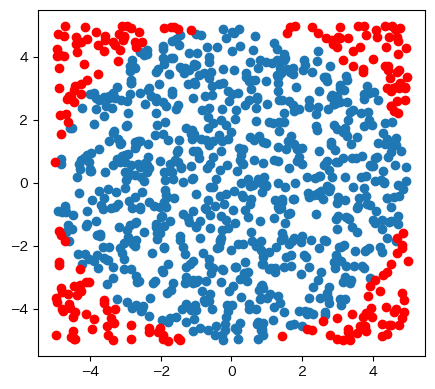

In [261]:
n = 1000
r = 5

rng = np.random.default_rng()
data = pd.DataFrame(rng.uniform(-r, r, (n, 2)))

data['square_mean'] = np.sqrt(data[0]**2 + data[1]**2)
inside_circle = data.query(f'square_mean <= {r}')
outside_circle = data.query(f'square_mean > {r}')
print(inside_circle.count()['square_mean'])

plt.figure(figsize=(5, 4.5))
plt.scatter(inside_circle[0], inside_circle[1])
plt.scatter(outside_circle[0], outside_circle[1], color='r')
plt.show()

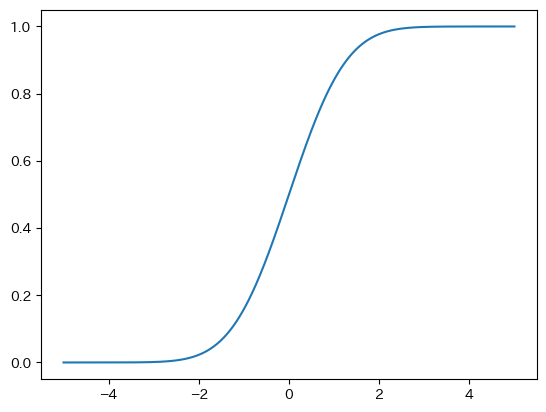

In [278]:
x = np.linspace(-5, 5, 1000)
y = stats.norm.cdf(x)
plt.plot(x, y)
plt.show()